In [2]:
#Import Packages
import pandas as pd
import numpy as np
from scipy.stats import norm
from Schedule.Schedule import Schedule
from Schedule.Stats import Stats
from Regression.ELO import ELO
from Regression.Game_Scores_v2 import Game_Scores
%matplotlib inline  

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
#Get schedule of games
sched_2014 = Schedule(b_dt = '10/1/2014')
sched_2015 = Schedule(b_dt = '10/1/2015')

In [4]:
#Add four factors
sched_2014.add_four_factors()
sched_2015.add_four_factors()

,GAME_DATE,Game_ID,H_WL,A_WL,Home Team,Away Team,H_PTS,A_PTS,Pts_diff,FGM_home,...,H_BLK,A_BLK,H_FF_EFG,H_FF_ORB,H_FF_FTFGA,H_FF_TOV,A_FF_EFG,A_FF_ORB,A_FF_FTFGA,A_FF_TOV
0,2016-04-09,21501188,1,0,ATL,BOS,118,107,11,46,...,10,6,0.619318,0.142857,0.102273,0.162152,0.505556,0.204082,0.177778,0.142099
1,2016-04-07,21501173,1,0,ATL,TOR,95,87,8,33,...,12,4,0.513158,0.116279,0.223684,0.139425,0.428571,0.181818,0.178571,0.114823
2,2016-04-05,21501157,1,0,ATL,PHX,103,90,13,39,...,3,4,0.468421,0.245283,0.147368,0.150432,0.444444,0.229167,0.222222,0.223881
3,2016-04-01,21501131,0,1,ATL,CLE,108,110,-2,38,...,8,6,0.447368,0.098039,0.242105,0.128822,0.459184,0.203704,0.204082,0.106534
4,2016-03-25,21501076,1,0,ATL,MIL,101,90,11,41,...,6,9,0.448454,0.340000,0.144330,0.111698,0.434524,0.363636,0.202381,0.158831
5,2016-03-21,21501048,0,1,ATL,WAS,102,117,-15,38,...,6,3,0.570513,0.054054,0.166667,0.143619,0.576923,0.225000,0.131868,0.090180
6,2016-03-19,21501029,1,0,ATL,HOU,109,97,12,44,...,6,3,0.579545,0.200000,0.079545,0.159553,0.422619,0.326087,0.309524,0.170614
7,2016-03-17,21501015,1,0,ATL,DEN,116,98,18,40,...,8,4,0.575000,0.189189,0.300000,0.123305,0.482759,0.214286,0.160920,0.140732
8,2016-03-13,21500984,1,0,ATL,IND,104,75,29,40,...,6,5,0.558824,0.225000,0.105882,0.157233,0.408046,0.145833,0.045977,0.161486
9,2016-03-12,21500974,1,0,ATL,MEM,95,83,12,36,...,12,5,0.494048,0.173913,0.142857,0.116427,0.378947,0.338983,0.115789,0.164677


In [5]:
# Create last n statistics
games = sched_2014.get_games().append(sched_2015.get_games()).reset_index(drop=True)
stats = Stats(games, 'avg', 'GAME_DATE', 'Home Team', 'Away Team', 'Pts_diff', ['Game_ID'])

In [6]:
# Creates stats for last 5 games
stats_5 = stats.get_lastn_stats(5)
stats_5.to_csv('stats_5.csv', index=False)
stats_5 = pd.read_csv('stats_5.csv')

In [7]:
#filters out games with insufficient data
print len(stats_5)

stats_5 = stats_5[stats_5['H_5_games']==5]
print len(stats_5)

stats_5 = stats_5[stats_5['A_5_games']==5]
print len(stats_5)

2460
2312
2303


In [8]:
# Creates elo scores
elo = ELO(games, 'GAME_DATE', 'Home Team', 'Away Team', 'H_PTS', 'A_PTS')
elo_data = elo.create_elo(1500, 20, 100, '538')

In [9]:
# Joins ELO data back to games
for index, game in games.iterrows():
    game_dt = game['GAME_DATE']
    poss_elo = elo_data[elo_data.index < game_dt]
    
    h_team = game['Home Team']
    if len(poss_elo) == 0:
        h_elo_score = 1500
    else:
        h_elo_score = poss_elo.tail(1)[h_team][0]
    games.set_value(index, 'H_ELO', h_elo_score)
    
    a_team = game['Away Team']
    if len(poss_elo) == 0:
        a_elo_score = 1500
    else:
        a_elo_score = poss_elo.tail(1)[a_team][0]
    games.set_value(index, 'A_ELO', a_elo_score)

In [10]:
#Filter out early games with little ELO info
print len(games)
games = games.sort_values(by='GAME_DATE').reset_index(drop=True).ix[100:, :]
print len(games)

2460
2360


In [19]:
#Merges Last 5 data and ELO data
data = pd.merge(games[['Game_ID', 'H_ELO', 'A_ELO']], stats_5, on='Game_ID')

In [21]:
# Creates model
x_5_elo = stats_5.drop(['Game_ID','Pts_diff'], axis=1)
gs_5_elo = Game_Scores(stats_5, x_5_elo, 'Pts_diff')

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


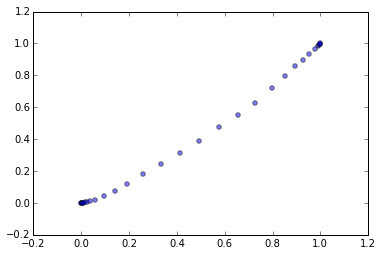

In [22]:
gs_5_elo.create_rank_order_graph()

In [23]:
gs_5_elo.get_model().get_mse()

144.95395727768323